In [2]:
import pandas as pd

data = pd.read_csv("E:/waterloo_documents/Diversity in SE/project/new_pullreq.csv") 


In [3]:
data.head()

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0


In [ ]:
data.columns

In [ ]:
pd.set_option('display.max_columns', None)
data.head()

In [ ]:
data[['project_id', 'ownername', 'reponame','merged_or_not', 'perc_neg_emotion', 'perc_pos_emotion', 'perc_neu_emotion', 'contrib_gender', 'contrib_country', 'contrib_affiliation', 'inte_country', 'same_country', 'same_affiliation']].dropna(subset=['contrib_gender'])

In [5]:
data_subset = data[['project_id', 'ownername', 'reponame','merged_or_not', 'contrib_gender', 'contrib_country', 'inte_country', 'same_country']].dropna(subset=['contrib_gender', 'contrib_country'])
data_subset.head()

,project_id,ownername,reponame,merged_or_not,contrib_gender,contrib_country,inte_country,same_country
2,93139005,binary-com,SmartCharts,1,male,malaysia,malaysia,1.0
3,15059440,letsencrypt,boulder,1,male,canada,NaN,NaN
8,1808,candlepin,subscription-manager,1,male,united states,NaN,NaN
11,73033219,Zeit,docs,1,male,peru,united kingdom,0.0
16,46403735,portainer,portainer,1,male,united states,united states,1.0


In [6]:
data_subset.groupby(['contrib_country', 'contrib_gender', 'merged_or_not'], as_index = False)

In [7]:
data_us = data_subset[data_subset.contrib_country=='united states']
data_us.groupby('contrib_gender')['ownername'].count()

contrib_gender
female     45174
male      559641
Name: ownername, dtype: int64

In [9]:
sub_saharan_africa = ["angola","benin","botswana","burkina faso","burundi","cabo verde","cameroon","central african republic","chad" "comoros ","congo","cote d'ivoire","democratic republic of the congo","djibouti","equatorial guinea","eritrea","ethiopia","gabon","gambia","ghana","guinea","guinea-bissau ","kenya","lesotho","liberia","madagascar","malawi","mali","mauritania","mauritius","mayotte","mozambique" "namibia","niger","nigeria","reunion","rwanda","sao tome and principe","senegal","seychelles","sierra leone","somalia","south africa","south sudan","swaziland","togo","uganda","tanzania","zambia","zimbabwe"]
northern_africa_and_western_asia = ["algeria", "egypt", "libya", "morocco", "sudan", "tunisia", "western sahara", "azerbaijan", "armenia", "bahrain", "cyprus", "georgia", "iraq", "israel", "jordan", "kuwait", "lebanon", "palestinian territories", "oman", "qatar", "saudi arabia", "syria", "turkey", "united arab emirates", "yemen"]
central_and_southern_asia =["kazakhstan", "kyrgyzstan", "tajikistan", "turkmenistan", "uzbekistan", "afghanistan", "bangladesh", "bhutan", "india", "iran", "maldives", "nepal", "pakistan", "sri lanka"]
eastern_and_south_eastern_asia = ["vietnam","taiwan","macau","laos","china", "hong kong", "china, macao sar", "south korea", "japan", "mongolia", "north korea", "brunei", "cambodia", "indonesia", "lao people's democratic republic", "malaysia", "myanmar", "philippines", "singapore", "thailand", "timor-leste", "viet nam"]
latin_america_and_the_caribbean = ["anguilla", "antigua and barbuda", "aruba", "bahamas", "barbados", "bonaire, sint eustatius and saba", "virgin islands", "cayman islands", "cuba", "curacao", "dominica", "dominican republic", "grenada", "guadeloupe", "haiti", "jamaica", "martinique", "montserrat", "puerto rico", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "sint maarten (dutch part)", "trinidad and tobago", "turks and caicos islands", "united states virgin islands", "belize", "honduras", "costa rica", "el salvador", "guatemala", "mexico", "nicaragua", "panama", "argentina", "bolivia", "brazil", "chile", "colombia", "ecuador", "french guiana", "falkland islands (malvinas)", "south georgia & the south sandwich islands", "guyana", "paraguay", "peru", "suriname", "uruguay", "venezuela"]
oceania=["australia", "christmas island", "cocos (keeling) islands", "heard island & mcdonald islands", "norfolk island", "new zealand", "melanesia", "micronesia", "french polynesia"]
europe_and_northern_america = ["bermuda", "canada", "greenland", "united states", "europe", "bulgaria", "belarus", "czech republic", "hungary", "moldova", "poland", "romania", "russia", "slovakia", "ukraine", "åland islands", "channel islands", "denmark", "estonia", "faroe islands", "finland", "isle of man", "united kingdom", "iceland", "ireland", "latvia", "lithuania", "norway", "sweden", "albania", "andorra", "bosnia and herzegovina", "croatia", "greece", "italy", "malta", "montenegro", "portugal", "san marino", "serbia", "slovenia", "spain", "macedonia", "austria", "belgium", "switzerland", "germany", "france", "liechtenstein", "luxembourg", "monaco", "netherlands antilles","netherlands","antarctica","gibraltar","guam","guernsey","jersey","kosovo","new caledonia","pitcairn islands","northern mariana islands"]

In [10]:
data_subset.loc[data_subset["contrib_country"].isin(sub_saharan_africa), "contrib_country"] = "sub_saharan_africa"
data_subset.loc[data_subset["contrib_country"].isin(northern_africa_and_western_asia), "contrib_country"] = "northern_africa_and_western_asia"
data_subset.loc[data_subset["contrib_country"].isin(central_and_southern_asia), "contrib_country"] = "central_and_southern_asia"
data_subset.loc[data_subset["contrib_country"].isin(eastern_and_south_eastern_asia), "contrib_country"] = "eastern_and_south_eastern_asia"
data_subset.loc[data_subset["contrib_country"].isin(latin_america_and_the_caribbean), "contrib_country"] = "latin_america_and_the_caribbean"
data_subset.loc[data_subset["contrib_country"].isin(oceania), "contrib_country"] = "oceania"
data_subset.loc[data_subset["contrib_country"].isin(europe_and_northern_america), "contrib_country"] = "europe_and_northern_america"
data_subset.loc[data_subset["contrib_country"].isin(["mozambique"]), "contrib_country"] = "sub_saharan_africa"

In [ ]:
data_subset

In [6]:
a = data_subset.groupby(['contrib_country', 'contrib_gender'], as_index = False)['project_id'].count()
a

,contrib_country,contrib_gender,project_id
0,central_and_southern_asia,female,2084
1,central_and_southern_asia,male,8577
2,eastern_and_south_eastern_asia,female,12954
3,eastern_and_south_eastern_asia,male,63872
4,europe_and_northern_america,female,86609
5,europe_and_northern_america,male,1046385
6,latin_america_and_the_caribbean,female,2019
7,latin_america_and_the_caribbean,male,33297
8,northern_africa_and_western_asia,female,882
9,northern_africa_and_western_asia,male,11678


In [7]:

data_f = a.loc[a['contrib_gender'] == "female"]
data_f

,contrib_country,contrib_gender,project_id
0,central_and_southern_asia,female,2084
2,eastern_and_south_eastern_asia,female,12954
4,europe_and_northern_america,female,86609
6,latin_america_and_the_caribbean,female,2019
8,northern_africa_and_western_asia,female,882
10,oceania,female,1825
12,sub_saharan_africa,female,217


In [8]:
data_m = a.loc[a['contrib_gender'] == "male"]
data_m

,contrib_country,contrib_gender,project_id
1,central_and_southern_asia,male,8577
3,eastern_and_south_eastern_asia,male,63872
5,europe_and_northern_america,male,1046385
7,latin_america_and_the_caribbean,male,33297
9,northern_africa_and_western_asia,male,11678
11,oceania,male,24889
13,sub_saharan_africa,male,5982


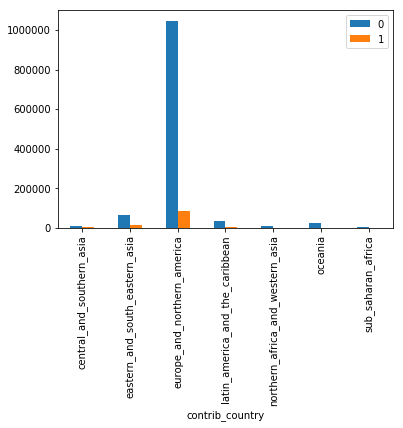

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(np.c_[data_m['project_id'],data_f['project_id']], index=data_m['contrib_country'])
df.plot.bar()

plt.show()


In [4]:
data_subset1 = data[['project_id', 'ownername', 'reponame','merged_or_not', 'contrib_gender', 'contrib_country', 'inte_country', 'same_country']].dropna(subset=['contrib_gender', 'contrib_country'])
data_subset1.head()

,project_id,ownername,reponame,merged_or_not,contrib_gender,contrib_country,inte_country,same_country
2,93139005,binary-com,SmartCharts,1,male,malaysia,malaysia,1.0
3,15059440,letsencrypt,boulder,1,male,canada,NaN,NaN
8,1808,candlepin,subscription-manager,1,male,united states,NaN,NaN
11,73033219,Zeit,docs,1,male,peru,united kingdom,0.0
16,46403735,portainer,portainer,1,male,united states,united states,1.0


In [5]:
# jersey and guernsey is close to France so I put it in western_europe
# Gibraltar is close to spain but it is a British territory so not sure where to place it
# I placed Kosovo in southern_europe since it is close to albania and serbia
# Not sure about Pitcairin islands as well

sub_saharan_africa = ["angola","benin","botswana","burkina faso","burundi","cabo verde","cameroon","central african republic","chad" "comoros ","congo","cote d'ivoire","democratic republic of the congo","djibouti","equatorial guinea","eritrea","ethiopia","gabon","gambia","ghana","guinea","guinea-bissau ","kenya","lesotho","liberia","madagascar","malawi","mali","mauritania","mauritius","mayotte","mozambique" "namibia","niger","nigeria","reunion","rwanda","sao tome and principe","senegal","seychelles","sierra leone","somalia","south africa","south sudan","swaziland","togo","uganda","tanzania","zambia","zimbabwe"]
northern_africa = ["algeria", "egypt", "libya", "morocco", "sudan", "tunisia", "western sahara"]
western_asia =  ["azerbaijan", "armenia", "bahrain", "cyprus", "georgia", "iraq", "israel", "jordan", "kuwait", "lebanon", "palestinian territories", "oman", "qatar", "saudi arabia", "syria", "turkey", "united arab emirates", "yemen"]
central_asia =["kazakhstan", "kyrgyzstan", "tajikistan", "turkmenistan", "uzbekistan"]
southern_asia = ["afghanistan", "bangladesh", "bhutan", "india", "iran", "maldives", "nepal", "pakistan", "sri lanka"]
eastern_asia = ["vietnam","taiwan","macau","laos","china", "hong kong", "china, macao sar", "south korea", "japan", "mongolia", "north korea"]
south_eastern_asia = ["brunei", "cambodia", "indonesia", "lao people's democratic republic", "malaysia", "myanmar", "philippines", "singapore", "thailand", "timor-leste", "viet nam"]
caribbean = ["anguilla", "antigua and barbuda", "aruba", "bahamas", "barbados", "bonaire, sint eustatius and saba", "virgin islands", "cayman islands", "cuba", "curacao", "dominica", "dominican republic", "grenada", "guadeloupe", "haiti", "jamaica", "martinique", "montserrat", "puerto rico", "saint kitts and nevis", "saint lucia", "saint vincent and the grenadines", "sint maarten (dutch part)", "trinidad and tobago", "turks and caicos islands", "united states virgin islands"]
central_america = ["belize", "honduras", "costa rica", "el salvador", "guatemala", "mexico", "nicaragua", "panama"]
south_america = ["argentina", "bolivia", "brazil", "chile", "colombia", "ecuador", "french guiana", "falkland islands (malvinas)", "south georgia & the south sandwich islands", "guyana", "paraguay", "peru", "suriname", "uruguay", "venezuela"]
australia_and_new_zealand = ["australia", "christmas island", "cocos (keeling) islands", "heard island & mcdonald islands", "norfolk island", "new zealand"]
melanesia = ["fiji", "new caledonia", "papua new guinea", "solomon islands", "vanuatu"]
micronesia = ["kiribati", "marshall islands", "micronesia (federated states of)", "nauru", "northern mariana islands", "palau", "guam"]
polynesia = ["french polynesia", "wallis and futuna island", "pitcairn", "cook islands", "niue", "tokelau", "tonga", "tuvalu", "american samoa", "samoa"]
northern_america = ["bermuda", "canada", "greenland", "united states"]
eastern_europe = ["bulgaria", "belarus", "czech republic", "hungary", "moldova", "poland", "romania", "russia", "slovakia", "ukraine"]
western_europe = ["austria", "belgium", "switzerland", "germany", "france", "liechtenstein", "luxembourg", "monaco", "netherlands antilles","netherlands", "jersey", "guernsey"]
northern_europe = ["åland islands", "channel islands", "denmark", "estonia", "faroe islands", "finland", "isle of man", "united kingdom", "iceland", "ireland", "latvia", "lithuania", "norway", "sweden"]
southern_europe = ["albania", "andorra", "bosnia and herzegovina", "croatia", "greece", "italy", "malta", "montenegro", "portugal", "san marino", "serbia", "slovenia", "spain", "macedonia", "kosovo"]

In [6]:
data_subset1.loc[data_subset1["contrib_country"].isin(sub_saharan_africa), "contrib_country"] = "sub_saharan_africa"
data_subset1.loc[data_subset1["contrib_country"].isin(northern_africa), "contrib_country"] = "northern_africa"
data_subset1.loc[data_subset1["contrib_country"].isin(western_asia), "contrib_country"] = "western_asia"
data_subset1.loc[data_subset1["contrib_country"].isin(central_asia), "contrib_country"] = "central_asia"
data_subset1.loc[data_subset1["contrib_country"].isin(southern_asia), "contrib_country"] = "southern_asia"
data_subset1.loc[data_subset1["contrib_country"].isin(eastern_asia), "contrib_country"] = "eastern_asia"
data_subset1.loc[data_subset1["contrib_country"].isin(south_eastern_asia), "contrib_country"] = "south_eastern_asia"
data_subset1.loc[data_subset1["contrib_country"].isin(caribbean), "contrib_country"] = "caribbean"
data_subset1.loc[data_subset1["contrib_country"].isin(central_america), "contrib_country"] = "central_america"
data_subset1.loc[data_subset1["contrib_country"].isin(south_america), "contrib_country"] = "south_america"
data_subset1.loc[data_subset1["contrib_country"].isin(australia_and_new_zealand), "contrib_country"] = "australia_and_new_zealand"
data_subset1.loc[data_subset1["contrib_country"].isin(melanesia), "contrib_country"] = "melanesia"
data_subset1.loc[data_subset1["contrib_country"].isin(micronesia), "contrib_country"] = "micronesia"
data_subset1.loc[data_subset1["contrib_country"].isin(polynesia), "contrib_country"] = "polynesia"
data_subset1.loc[data_subset1["contrib_country"].isin(northern_america), "contrib_country"] = "northern_america"
data_subset1.loc[data_subset1["contrib_country"].isin(eastern_europe), "contrib_country"] = "eastern_europe"
data_subset1.loc[data_subset1["contrib_country"].isin(western_europe), "contrib_country"] = "western_europe"
data_subset1.loc[data_subset1["contrib_country"].isin(northern_europe), "contrib_country"] = "northern_europe"
data_subset1.loc[data_subset1["contrib_country"].isin(southern_europe), "contrib_country"] = "southern_europe"
data_subset1.loc[data_subset1["contrib_country"].isin(["mozambique"]), "contrib_country"] = "sub_saharan_africa"

In [7]:
data_grouped = data_subset1.groupby(['contrib_country', 'contrib_gender'], as_index = False)['project_id'].count()
data_grouped
listOfExtraRows = [pd.Series(['gibraltar', 'female', 0], index=data_grouped.columns ) ,
                pd.Series(['micronesia', 'female', 0], index=data_grouped.columns ) ,
                pd.Series(['polynesia', 'female', 0], index=data_grouped.columns ) ]
# gibraltar_female_row = {'contrib_country': 'gibraltar', 'contrib_gender': 'female', 'project_id': 0}
# micronesia_female_row = {'contrib_country': 'micronesia', 'contrib_gender': 'female', 'project_id': 0}
# polynesia_female_row = {'contrib_country': 'polynesia', 'contrib_gender': 'female', 'project_id': 0}
data_grouped = data_grouped.append(listOfExtraRows, ignore_index=True)
data_grouped

,contrib_country,contrib_gender,project_id
0,antarctica,female,4
1,antarctica,male,25
2,australia_and_new_zealand,female,1825
3,australia_and_new_zealand,male,24885
4,caribbean,female,24
5,caribbean,male,722
6,central_america,female,698
7,central_america,male,5132
8,central_asia,female,25
9,central_asia,male,794


In [8]:
data_female = data_grouped.loc[data_grouped['contrib_gender'] == "female"]
data_female = data_female.rename(columns={"project_id": "female_count"})
data_female


,contrib_country,contrib_gender,female_count
0,antarctica,female,4
2,australia_and_new_zealand,female,1825
4,caribbean,female,24
6,central_america,female,698
8,central_asia,female,25
10,eastern_asia,female,11716
12,eastern_europe,female,7878
15,melanesia,female,3
18,northern_africa,female,36
20,northern_america,female,45299


In [9]:
data_male = data_grouped.loc[data_grouped['contrib_gender'] == "male"]
data_male = data_male.rename(columns={"project_id": "male_count"})
data_male

,contrib_country,contrib_gender,male_count
1,antarctica,male,25
3,australia_and_new_zealand,male,24885
5,caribbean,male,722
7,central_america,male,5132
9,central_asia,male,794
11,eastern_asia,male,55008
13,eastern_europe,male,116209
14,gibraltar,male,10
16,melanesia,male,1
17,micronesia,male,221


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.merge(data_male, data_female, on='contrib_country')
df = df.drop(['contrib_gender_x', 'contrib_gender_y'], axis=1)
df = df.set_index('contrib_country')
#df = pd.DataFrame(np.c_[data_male['project_id'],data_female['project_id']], index=data_male['contrib_country'])
df

,male_count,female_count
contrib_country,,
antarctica,25,4
australia_and_new_zealand,24885,1825
caribbean,722,24
central_america,5132,698
central_asia,794,25
eastern_asia,55008,11716
eastern_europe,116209,7878
gibraltar,10,0
melanesia,1,3


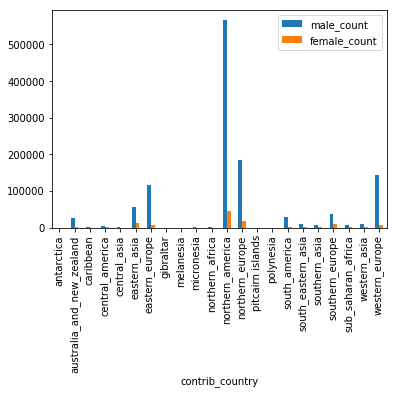

In [41]:
df.plot(kind = 'bar')

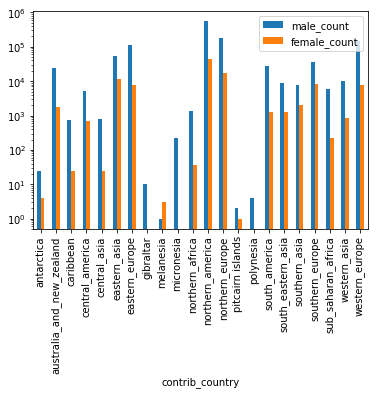

In [42]:
# Log scaling
df.plot(kind = 'bar', logy=True)

In [43]:
# Scaling does not reflect our actual results
# df_max_scaled = df.copy()
  
# # apply normalization techniques
# for column in df_max_scaled.columns:
#     df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

# df_max_scaled.plot(kind = 'bar')

In [14]:
# Scaling contributors on the basis of total contributors.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.merge(data_male, data_female, on='contrib_country') 
total_contributors = df["male_count"] + df["female_count"]
df["male_count"] = df["male_count"] / total_contributors
df["female_count"] = df["female_count"] / total_contributors
df = df.drop(['contrib_gender_x', 'contrib_gender_y'], axis=1)
df = df.set_index('contrib_country')
df

,male_count,female_count
contrib_country,,
antarctica,0.862069,0.137931
australia_and_new_zealand,0.931674,0.068326
caribbean,0.967828,0.032172
central_america,0.880274,0.119726
central_asia,0.969475,0.030525
eastern_asia,0.824411,0.175589
eastern_europe,0.936512,0.063488
gibraltar,1.000000,0.000000
melanesia,0.250000,0.750000


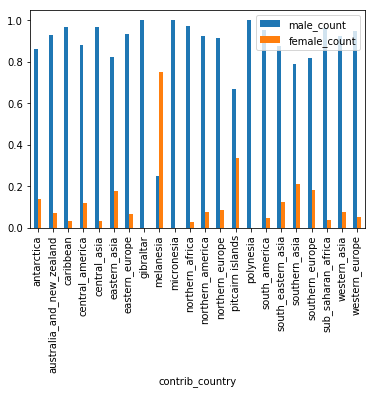

In [15]:
df.plot(kind = 'bar')